## Тестовое задание


In [1]:
#импортирование библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from plotly import graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from scipy import stats as st
import datetime
import math as math

import warnings
warnings.filterwarnings("ignore")

#pd опции 
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', None)
sns.set()

In [2]:
# прочитаем файл с данными о заданиях

file_name = 'test_data.xlsx'
task = pd.read_excel(file_name, sheet_name = 'task')
display(task.head())
print('Всего заданий = ', task.shape[0])
# звонках 
call = pd.read_excel(file_name, sheet_name = 'call')
display(call.head())

# результатах
result_product = pd.read_excel(file_name, sheet_name = 'result_product')
display(result_product.head())
print('Всего успешных продуктов  = ', result_product.shape[0])

task_id                               hid finish_dt_task  base_id  \
0  843083337  36d2f49fc49f572677416d54536a41c6     2020-04-15     7553   
1  844351919  ff34fad215457a0706186e347b6a3ac8     2020-04-27     7553   
2  844406657  d9d9e1c6f5c95b3d8c72bb528bb06022     2020-04-10     7553   
3  845152792  afdf70661693bbba8c31fb0b321b818c     2020-04-25     7553   
4  845814859  9b3a7955c46a7e9658288cb8acc43eac     2020-04-05     7553   

   task_result_id  
0               6  
1               6  
2               5  
3               5  
4               3

Всего заданий =  23119


task_id                 call_id       agent_name    call_dt  \
0  843083337  6645916908#16711160876     sakungurceva 2020-03-01   
1  843083337  6750206063#16711160876     sakungurceva 2020-03-17   
2  843083337  6769109629#16711160876     sakungurceva 2020-03-24   
3  843083337  6890964670#16711160876     sakungurceva 2020-04-15   
4  843083337  6926247810#16711160876  lapleshivenkova 2020-04-15   

   call_result_id  call_time_sec  
0               6            298  
1               6              9  
2               6            111  
3               5              7  
4               3           1329

hid product_type_cd approve_dt  reject_dt  \
0  0004c6142b4bf98fdb51ec0fead099b0             INV 2020-05-21        NaT   
1  0008ddccf50e9a72ee9c6223fb45e4c4             INV 2020-05-29        NaT   
2  000a2e5621a118118f42560c9821e6a1             INV 2020-04-27        NaT   
3  001a43fffa79a5b60c01473eeff9fd1f             INV        NaT 2020-04-01   
4  001c27126f4fd13cc4126d4906c48425             INV 2020-05-06        NaT   

    using_dt  
0        NaT  
1        NaT  
2 2020-04-29  
3        NaT  
4        NaT

Всего успешных продуктов  =  5999


In [3]:
# считываем словари данных
dict_calls = pd.read_excel(file_name, sheet_name = 'Словари', usecols = 'A:B', header = 1)
display(dict_calls.head())

dict_tasks = pd.read_excel(file_name, sheet_name = 'Словари', usecols = 'D:E',  header = 1)
display(dict_tasks.head())

dict_base = pd.read_excel(file_name, sheet_name = 'Словари', usecols = 'G:H',  header = 1)
display(dict_base.head())

call_result_id call_result_translation
0         6.00000        Дозвон, Отложить
1         5.00000                Недозвон
2         3.00000         Дозвон, Успешно
3         1.00000           Дозвон, Отказ
4         2.00000     Дозвон, Перезвонить

task_result_id        task_result_translation
0               6                        Успешно
1               5                          Отказ
2               3                       Недозвон
3               1                          Дубль
4               4  Неуспешно из-за другой заявки

base_id base_translation
0 7553.00000           База 1
1 3145.00000           База 2
2 3445.00000           База 3
3 7554.00000           База 4
4        nan              NaN

##  Задача 1:  

-  Составить общую таблицу с данными из всех источников и словарей.

1. Каждая запись в task это задание совершить коммуникацию с потенциальным клиентом для продажи продукта (т.е. task=клиент).
2. В рамках задания (task) может быть несколько звонков.
3. При успешной продаже (результат задания = Успешно) продукта можно проследить дальнейшие действия клиента (result_product)

In [4]:
# объединяем таблицы в одну
full_table = call.merge(task, on = 'task_id', how = 'left').merge(result_product, on = 'hid', how = 'left')
display(full_table.head(5))
full_table.info()
print('Число заданий = ', full_table['task_id'].nunique())
print('Число успешных продуктов = ', full_table[full_table['task_result_id'] == 6]['hid'].nunique())

task_id                 call_id       agent_name    call_dt  \
0  843083337  6645916908#16711160876     sakungurceva 2020-03-01   
1  843083337  6750206063#16711160876     sakungurceva 2020-03-17   
2  843083337  6769109629#16711160876     sakungurceva 2020-03-24   
3  843083337  6890964670#16711160876     sakungurceva 2020-04-15   
4  843083337  6926247810#16711160876  lapleshivenkova 2020-04-15   

   call_result_id  call_time_sec                               hid  \
0               6            298  36d2f49fc49f572677416d54536a41c6   
1               6              9  36d2f49fc49f572677416d54536a41c6   
2               6            111  36d2f49fc49f572677416d54536a41c6   
3               5              7  36d2f49fc49f572677416d54536a41c6   
4               3           1329  36d2f49fc49f572677416d54536a41c6   

  finish_dt_task  base_id  task_result_id product_type_cd approve_dt  \
0     2020-04-15     7553               6             INV        NaT   
1     2020-04-15     7553               6             INV        NaT   
2     2020-04-15     7553               6             INV        NaT   
3     2020-04-15     7553               6             INV        NaT   
4     2020-04-15     7553               6             INV        NaT   

   reject_dt using_dt  
0 2020-04-22      NaT  
1 2020-04-22      NaT  
2 2020-04-22      NaT  
3 2020-04-22      NaT  
4 2020-04-22      NaT

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 0 to 39597
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   task_id          39598 non-null  int64         
 1   call_id          39598 non-null  object        
 2   agent_name       39598 non-null  object        
 3   call_dt          39598 non-null  datetime64[ns]
 4   call_result_id   39598 non-null  int64         
 5   call_time_sec    39598 non-null  int64         
 6   hid              39598 non-null  object        
 7   finish_dt_task   39598 non-null  datetime64[ns]
 8   base_id          39598 non-null  int64         
 9   task_result_id   39598 non-null  int64         
 10  product_type_cd  8366 non-null   object        
 11  approve_dt       5337 non-null   datetime64[ns]
 12  reject_dt        3014 non-null   datetime64[ns]
 13  using_dt         2762 non-null   datetime64[ns]
dtypes: datetime64[ns](5), int64(5), object

## Задача 2.1

-  На основе данных из таблицы, созданной по Заданию 1, необходимо расчитать общую воронку продаж за все время наблюдений по базам. На основе решения П.1 визуализировать полученные данные в виде графиков/диаграмм, сформировать выводы и предложения. 


In [5]:
# рассчет воронки событий 

print('Всего заданий = ', full_table['task_id'].nunique())
print('Успешных дозвонов = ', (full_table['task_id'].nunique() - 
                                                full_table.query('task_result_id == 3')['task_id'].nunique()))
print('Успешных заданий = ', full_table.query('task_result_id == 6')['task_id'].nunique())
print('Одобренных продуктов = ', full_table[~full_table['approve_dt'].isna()]['hid'].nunique())
print('Использованных продуктов = ', full_table[~full_table['using_dt'].isna()]['hid'].nunique())

# формируем воронку
sales_funnel = pd.DataFrame(data = {'event': ['Всего заданий', 
                                              'Успешных дозвонов',
                                              'Успешных заданий', 
                                              'Одобренных продуктов',
                                              'Использованных продуктов'
                                             ],
                                    'n_tasks': [full_table['task_id'].nunique(),
                                                 (full_table['task_id'].nunique() - 
                                                full_table.query('task_result_id == 3')['task_id'].nunique()),
                                                full_table.query('task_result_id == 6')['task_id'].nunique(),
                                               full_table[~full_table['approve_dt'].isna()]['hid'].nunique(),
                                               full_table[~full_table['using_dt'].isna()]['hid'].nunique()]
                                               
                                   })
display(sales_funnel)
# воронка соытий в процентах от начальных данных
fig = go.Figure(go.Funnel(
    y = sales_funnel['event'],
    x = sales_funnel['n_tasks'],
    textinfo = "value+percent initial"))
fig.update_layout(title = "Воронка событий")
fig.write_image('test_funnel_full_per.jpg', scale = 4)
fig.show()

# воронка событий в процентах от предыдущего шага
fig = go.Figure(go.Funnel(
    y = sales_funnel['event'],
    x = sales_funnel['n_tasks'],
    textinfo = "value+percent previous"))
fig.update_layout(title = "Воронка событий")
fig.write_image('test_funnel.jpg', scale = 4)
fig.show()



Всего заданий =  23119
Успешных дозвонов =  15486
Успешных заданий =  6011
Одобренных продуктов =  3724
Использованных продуктов =  1961


event  n_tasks
0             Всего заданий    23119
1         Успешных дозвонов    15486
2          Успешных заданий     6011
3      Одобренных продуктов     3724
4  Использованных продуктов     1961

**Вывод:**
- Всего выполненно заданий	= 23119, из них успешных дозвонов(все задания - задания с результатом *недозвон*) = 15486 (67%), из них успешных заданий(task_result_id = 6) 6011(39%), из этих заданий одобрено 62%(3724) и 1961(53%)  начали пользоваться продуктом

- предложения: много недозвонов - в чем проблема - люди не берут трубки или некорректная база 

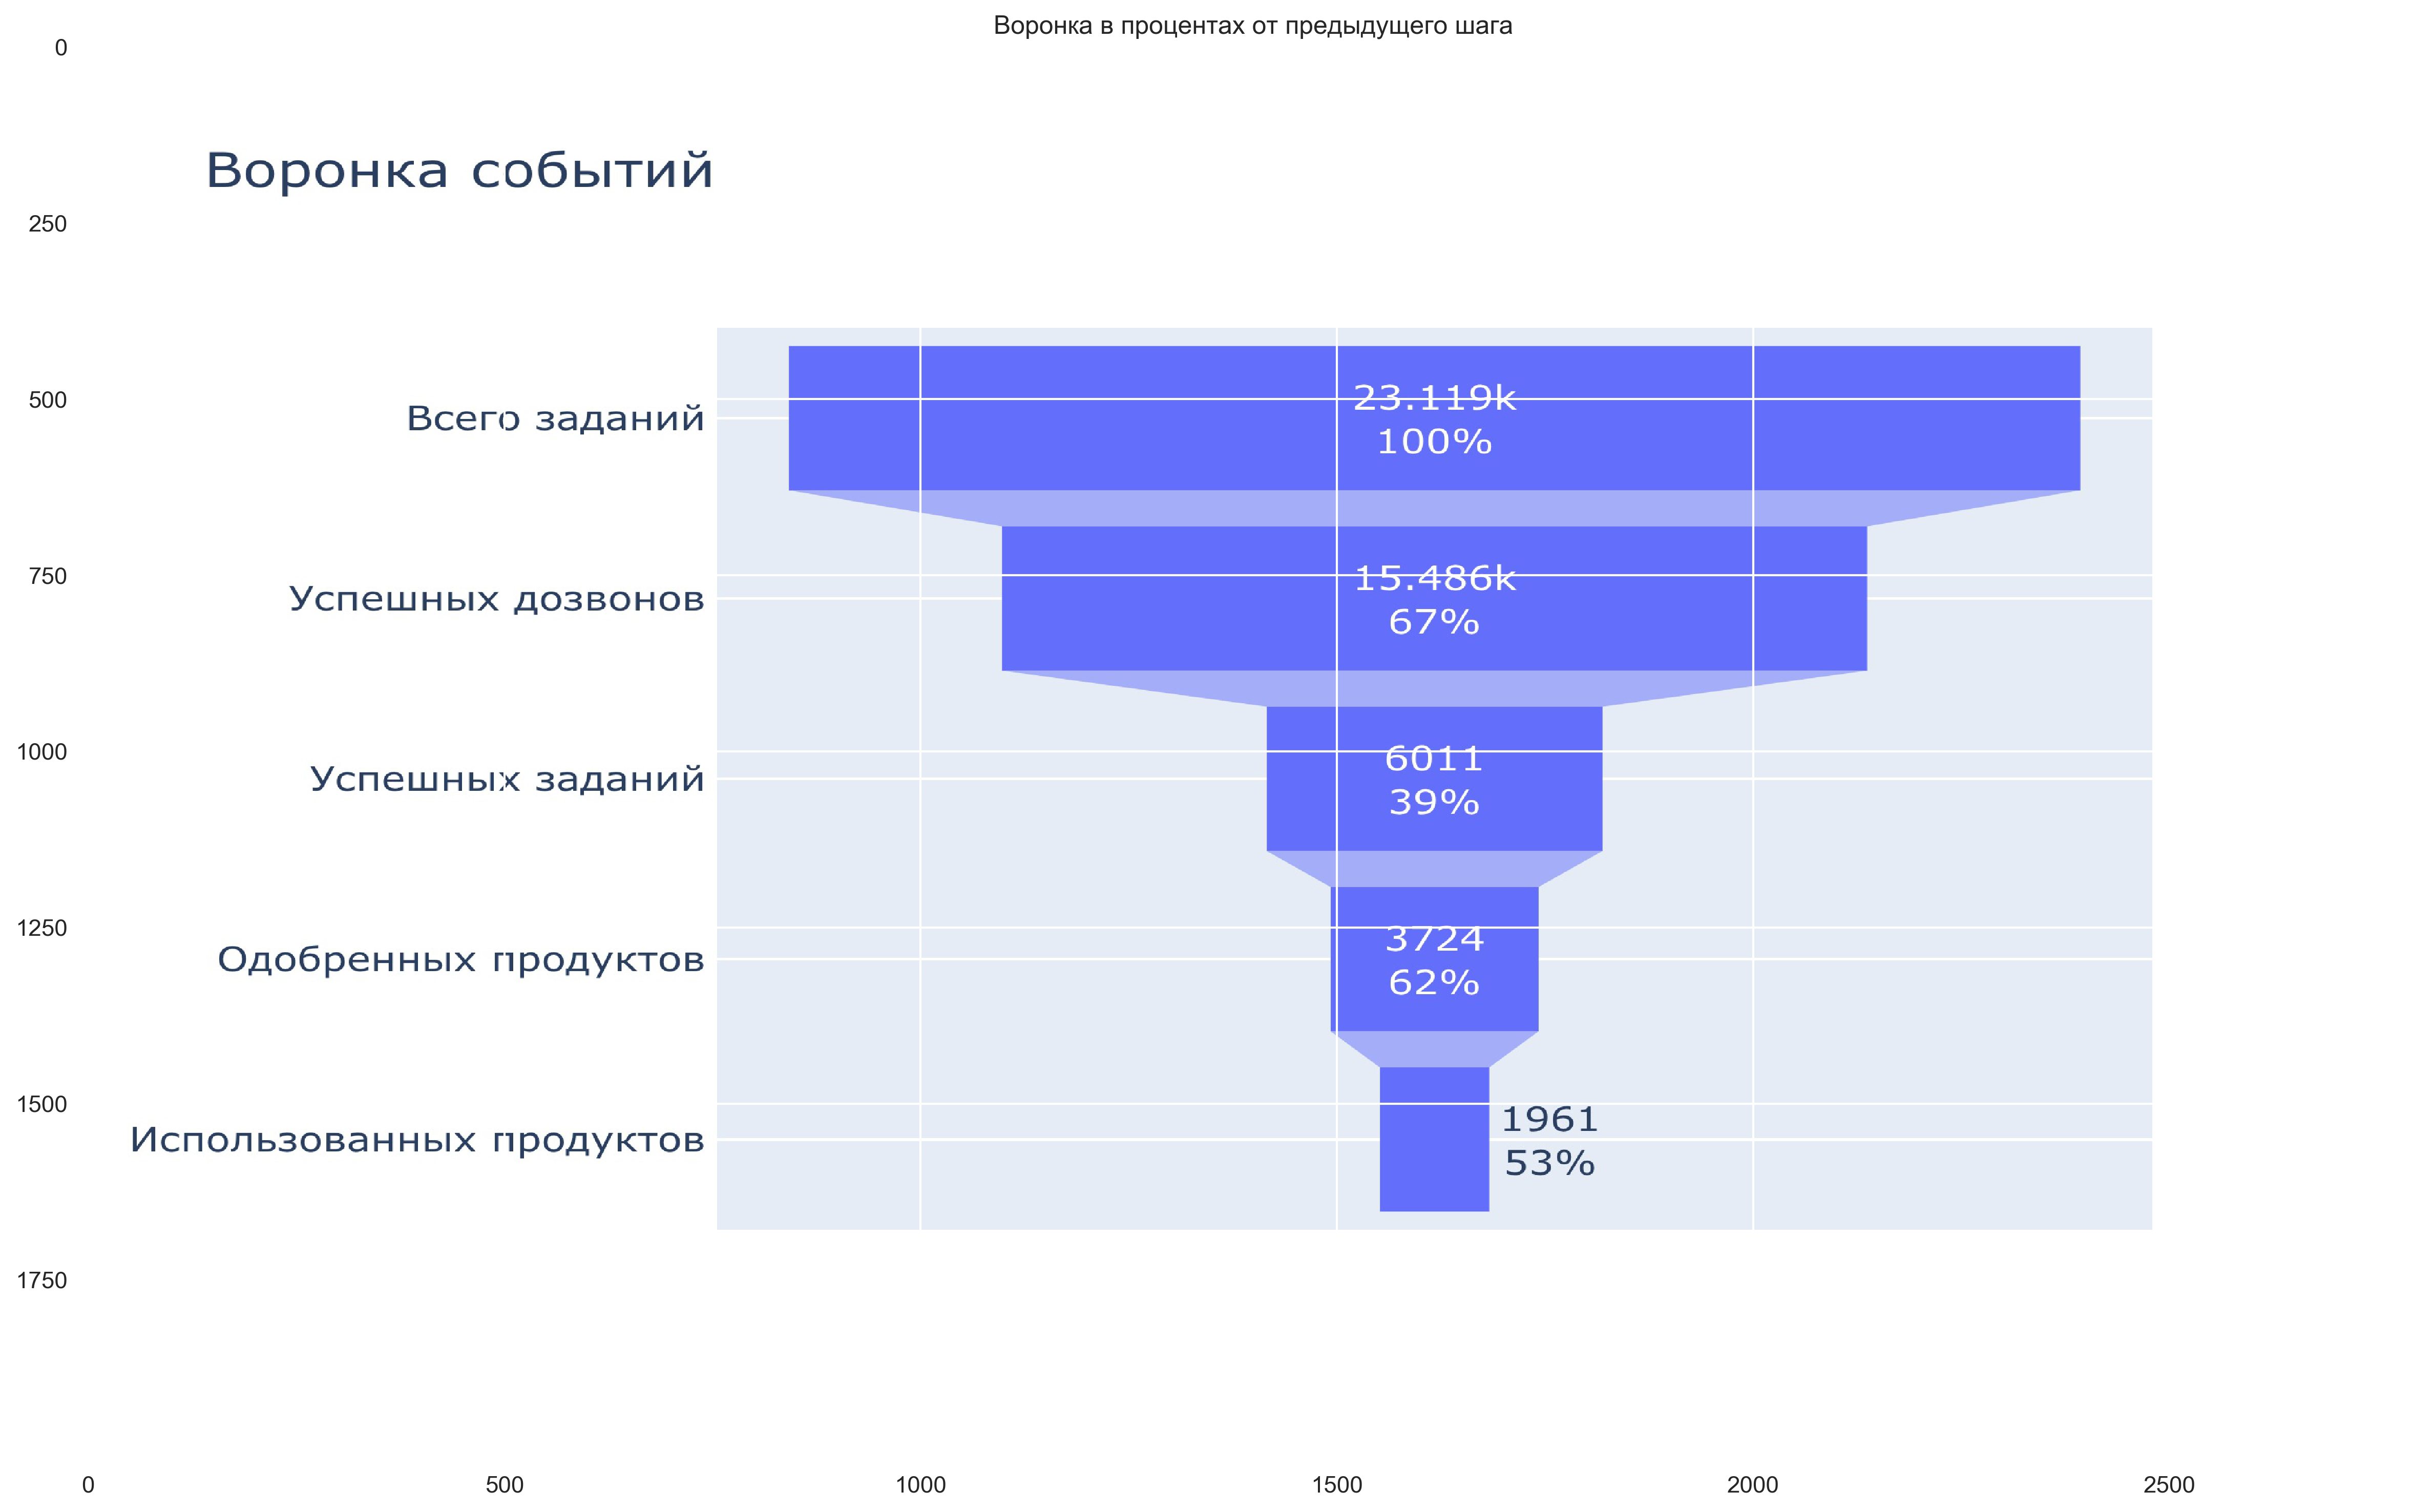

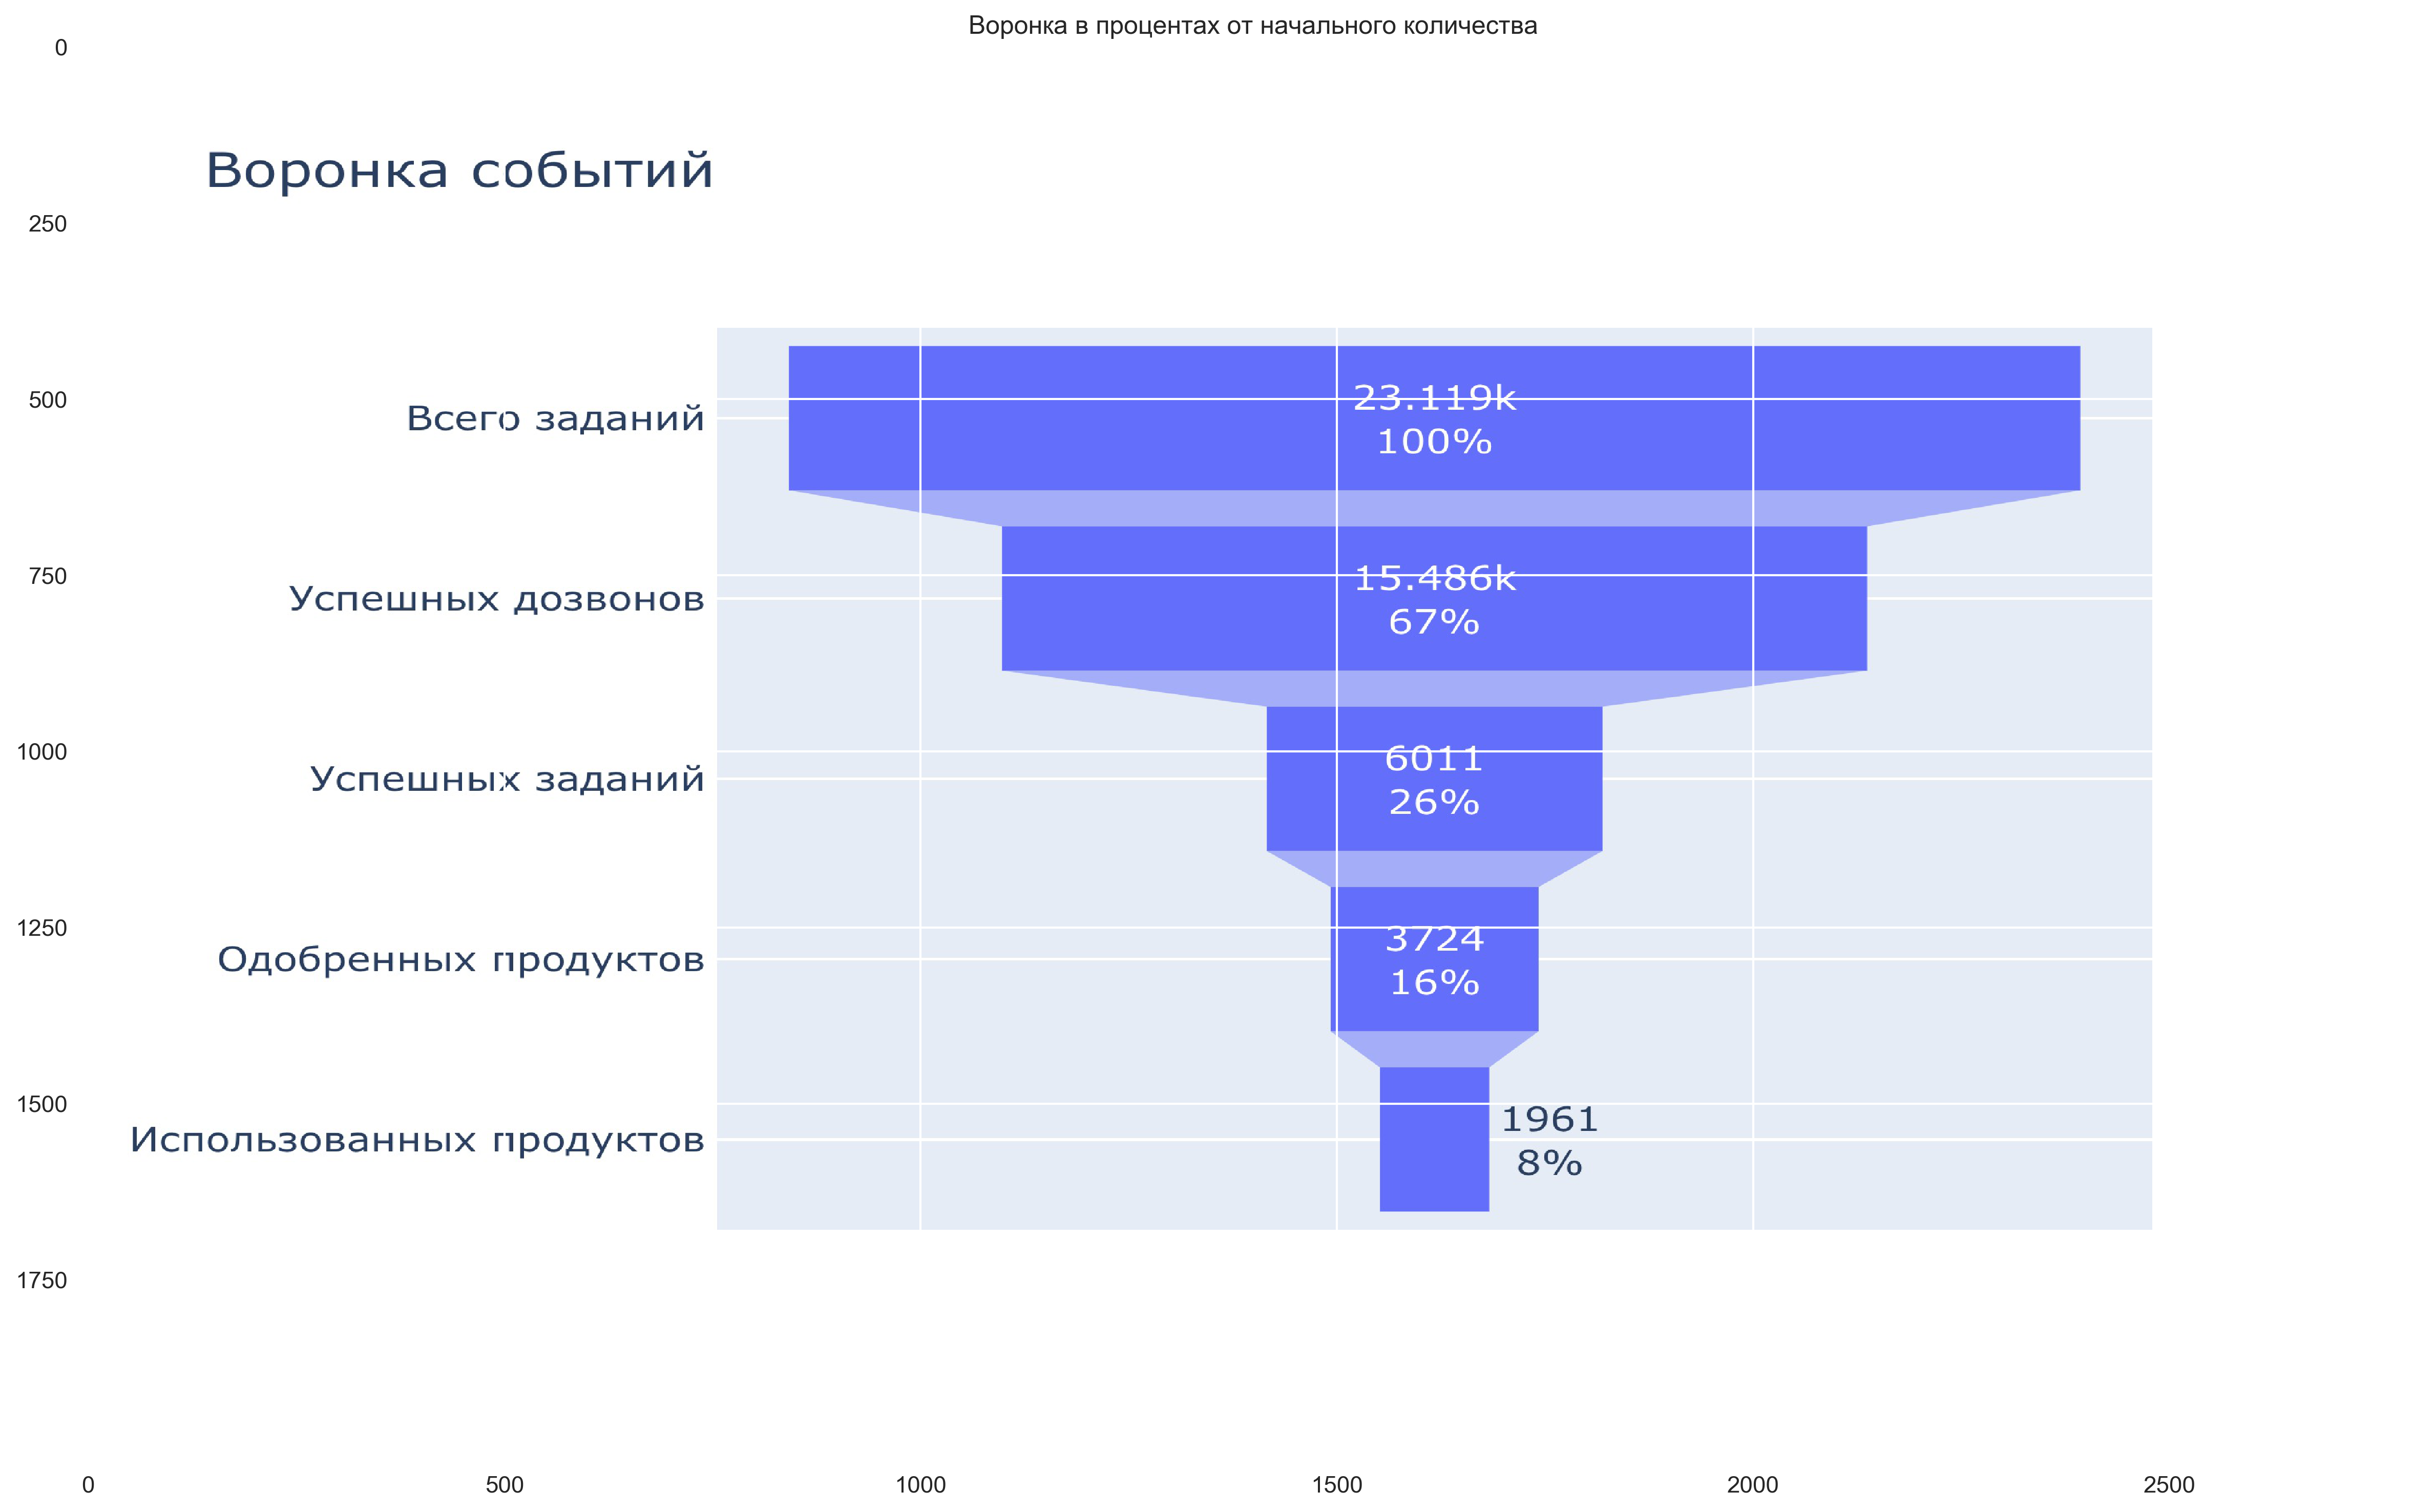

In [6]:
#  повторяем картинки для отображения оффлайн

plt.figure(figsize=(16 ,10), dpi = 300, tight_layout = True)
img = mpimg.imread('test_funnel.jpg')
plt.imshow(img,aspect='auto')
plt.title('Воронка в процентах от предыдущего шага')
plt.show()

plt.figure(figsize=(16 ,10), dpi = 300, tight_layout = True)
img = mpimg.imread('test_funnel_full_per.jpg')
plt.imshow(img,aspect='auto')
plt.title('Воронка в процентах от начального количества')
plt.show()

## Задача 2.2

- Расчитать показатели сотрудников, количество звонков , продажную конверсию ("Дозвон, Успешно"/("Дозвон, Отказ" + "Дозвон, успешно")), среднее время в звонке.

In [7]:
# Расчитать показатели сотрудников, 
agents_data = full_table.groupby('agent_name').agg(
                                n_calls = ('call_id','count'),   # количество звонков 
                                avg_call_sec = ('call_time_sec', 'mean') #среднее время в звонке.
                                    ).reset_index()
#display(agents_data)

#продажную конверсию ("Дозвон, Успешно"/("Дозвон, Отказ" + "Дозвон, успешно")), 

agents_tmp = full_table.pivot_table(values = 'call_id', 
                       index = 'agent_name', 
                       columns =  'call_result_id',
                       aggfunc = 'count').reset_index()
print(agents_tmp.columns)
agents_tmp  = agents_tmp.rename(columns = {1:'call_reject', 3:"call_success"})

agents_tmp['conversion'] = agents_tmp['call_success']/(agents_tmp['call_reject']+agents_tmp['call_success']) # конверсия
display(agents_tmp.head())

# объединим все в полную базу
agents_data = agents_data.merge(agents_tmp[['agent_name','call_success', 'call_reject', 'conversion']],
                                on = 'agent_name', 
                                how = 'left')
agents_data['conversion'] = agents_data['conversion'].fillna(0)
display(agents_data.head())

Index(['agent_name', 1, 2, 3, 4, 5, 6], dtype='object', name='call_result_id')


call_result_id         agent_name  call_reject        2  call_success       4  \
0               aashapovalov64931     97.00000 73.00000      66.00000     nan   
1                        afgluxov     44.00000 52.00000      47.00000     nan   
2                    amshevchenko      3.00000  4.00000       1.00000     nan   
3                     arxackevich    100.00000 15.00000      72.00000     nan   
4                         asmirov     70.00000 67.00000      56.00000 2.00000   

call_result_id         5         6  conversion  
0              190.00000 123.00000     0.40491  
1               85.00000  35.00000     0.51648  
2                5.00000   5.00000     0.25000  
3              214.00000 128.00000     0.41860  
4              142.00000  32.00000     0.44444

agent_name  n_calls  avg_call_sec  call_success  call_reject  \
0  aashapovalov64931      549     100.14754      66.00000     97.00000   
1           afgluxov      263     137.11787      47.00000     44.00000   
2       amshevchenko       18     206.55556       1.00000      3.00000   
3        arxackevich      529     140.09641      72.00000    100.00000   
4            asmirov      369     138.78320      56.00000     70.00000   

   conversion  
0     0.40491  
1     0.51648  
2     0.25000  
3     0.41860  
4     0.44444

In [8]:
print('Всего агентов', agents_data.shape[0])

Всего агентов 106


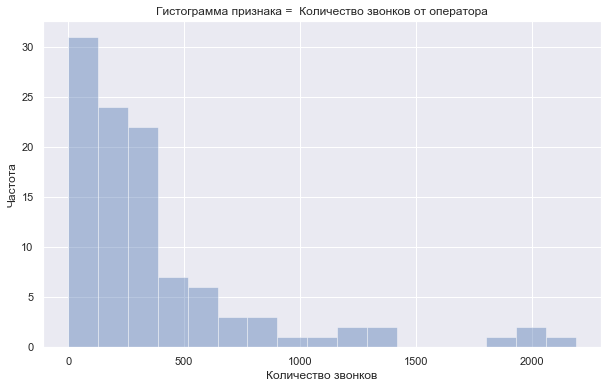

Статистика, количество звонков
count    106.00000
mean     373.56604
std      442.08560
min        1.00000
25%       96.00000
50%      250.50000
75%      413.50000
max     2186.00000
Name: n_calls, dtype: float64


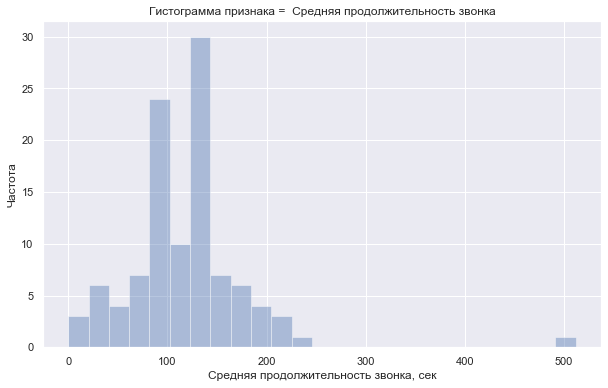

Статистика, средняя продолжительность звонка
count   106.00000
mean    118.50827
std      59.92372
min       0.00000
25%      89.38060
50%     120.74677
75%     138.54194
max     511.71429
Name: avg_call_sec, dtype: float64


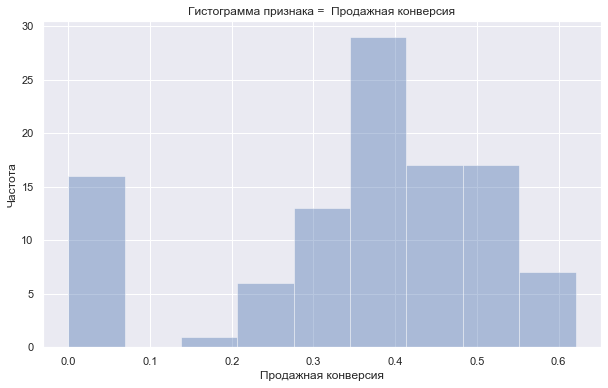

Статистика, продажная конверсия
count   106.00000
mean      0.34988
std       0.17158
min       0.00000
25%       0.29769
50%       0.39111
75%       0.47056
max       0.62069
Name: conversion, dtype: float64


In [11]:
# графики
# количество звонков
plt.figure(figsize = (10,6))
ax = sns.distplot(agents_data['n_calls'], kde = False )
ax.set(title = "Гистограмма признака =  Количество звонков от оператора",
        xlabel = 'Количество звонков',
        ylabel = "Частота")
plt.show() 
print('Статистика, количество звонков')
print(agents_data['n_calls'].describe())

# средняя продолжительность звонков 
plt.figure(figsize = (10,6))
ax = sns.distplot(agents_data['avg_call_sec'], kde = False)
ax.set(title = "Гистограмма признака =  Средняя продолжительность звонка",
        xlabel = 'Средняя продолжительность звонка, сек',
        ylabel = "Частота")
plt.show() 
      
print('Статистика, средняя продолжительность звонка')
print(agents_data['avg_call_sec'].describe())

# продажная конверсия
plt.figure(figsize = (10,6))
ax = sns.distplot(agents_data['conversion'],kde = False)
ax.set(title = "Гистограмма признака =  Продажная конверсия",
        xlabel = 'Продажная конверсия',
        ylabel = "Частота")
plt.show() 

print('Статистика, продажная конверсия')
print(agents_data['conversion'].describe())

In [12]:
#agents_data.nlargest(5,'n_calls')

In [13]:
print('Сотрудники без успешных звонков')
display(agents_data.query('conversion == 0')['agent_name'].to_list())

Сотрудники без успешных звонков


['dvkajdalova',
 'efskvortsova',
 'essamoxina42807',
 'evsamojlov26814',
 'eyulobanova',
 'eyuvinokurova',
 'iimakedonskaya',
 'maemelyanova',
 'nsbochkareva',
 'nvtereshhenko89702',
 'ogbogomolova',
 'ogsorokoletova28872',
 'ssshamuratova',
 'tavnukova',
 'tvleskovec',
 'yuapodorueva']

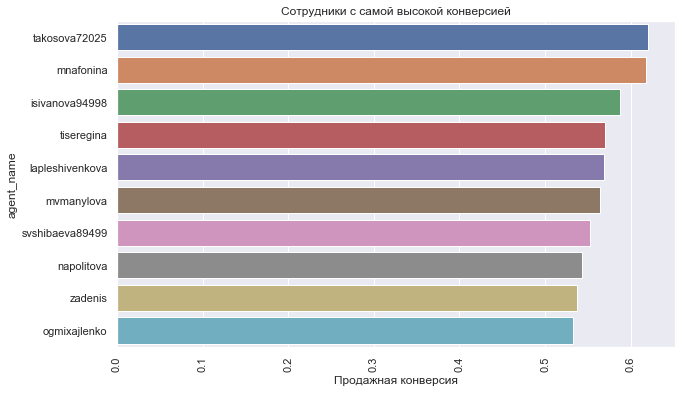

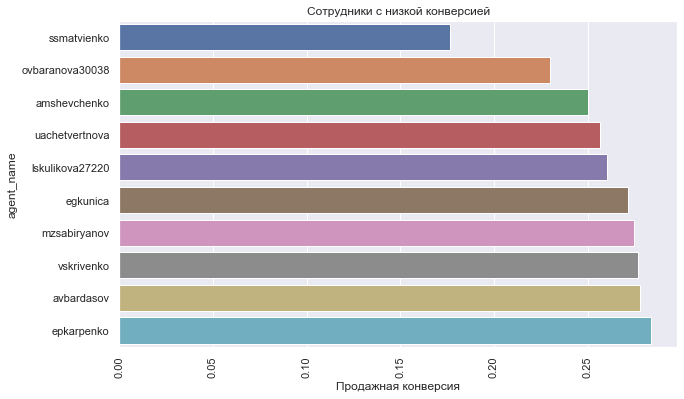

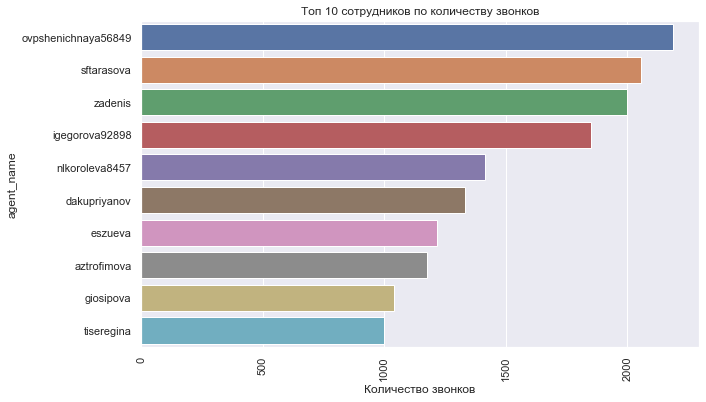

In [14]:
# топ 10 агентов по конверсии
plt.figure(figsize = (10,6))
ax = sns.barplot(y="agent_name", x="conversion", data=agents_data.nlargest(10, 'conversion'))
plt.xticks(rotation=90 ) 
ax.set(xlabel = 'Продажная конверсия',
      title = 'Сотрудники с самой высокой конверсией')
plt.show()

plt.figure(figsize = (10,6))
ax = sns.barplot(y="agent_name", x="conversion", data=agents_data.query('conversion > 0').nsmallest(10, 'conversion'))
plt.xticks(rotation=90 ) 
ax.set(xlabel = 'Продажная конверсия',
      title = 'Сотрудники с низкой конверсией')
plt.show()

plt.figure(figsize = (10,6))
column = 'n_calls'
ax = sns.barplot(y="agent_name", x=column, data=agents_data.nlargest(10, column))
ax.set(xlabel = 'Количество звонков',
      title = 'Топ 10 сотрудников по количеству звонков')
plt.xticks(rotation=90 )
plt.show()

# plt.figure(figsize = (10,6))
# column = 'avg_call_sec'
# ax = sns.barplot(y="agent_name", x=column, data=agents_data.query('avg_call_sec > 0').nsmallest(10, column))
# ax.set(xlabel = 'Средняя продолжительность звонка, сек',
#       title = 'Топ10 по ')
# plt.xticks(rotation=90 ) 

count   106.00000
mean      0.34988
std       0.17158
min       0.00000
25%       0.29769
50%       0.39111
75%       0.47056
max       0.62069
Name: conversion, dtype: float64


agent_name  n_calls  avg_call_sec  call_success  call_reject  \
0  aashapovalov64931      549     100.14754      66.00000     97.00000   
1           afgluxov      263     137.11787      47.00000     44.00000   
2       amshevchenko       18     206.55556       1.00000      3.00000   
3        arxackevich      529     140.09641      72.00000    100.00000   
4            asmirov      369     138.78320      56.00000     70.00000   

   conversion conversion_level  
0     0.40491          средняя  
1     0.51648    выше среднего  
2     0.25000    ниже среднего  
3     0.41860          средняя  
4     0.44444    выше среднего

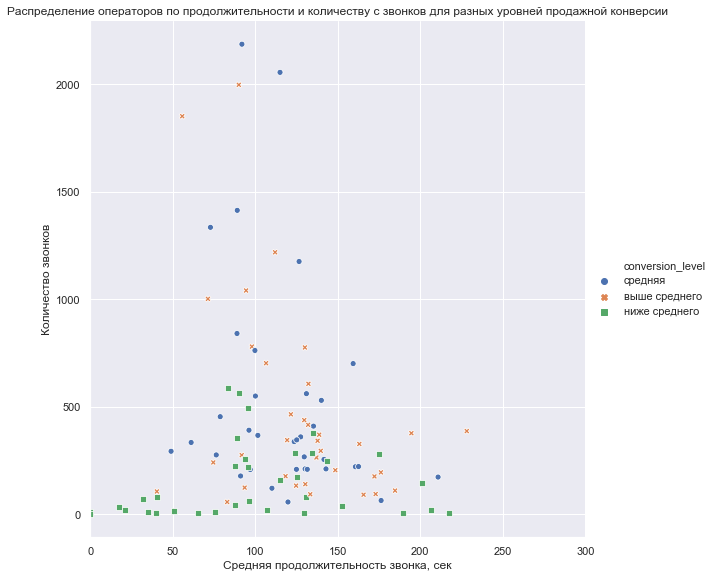

In [15]:
print(agents_data['conversion'].describe())
# добавим уровень продажной конверсии
agents_data['conversion_level'] = pd.qcut(agents_data['conversion'], 
                                        q = 3, 
                                        labels=['ниже среднего', 'средняя','выше среднего'])
display(agents_data.head())

ax = sns.relplot(x='avg_call_sec', 
          y = 'n_calls',
          hue="conversion_level", style="conversion_level",
          data = agents_data,
          height=8, 
          aspect=1) 
ax.set(title = 'Распределение операторов по продолжительности и количеству с звонков для разных уровней продажной конверсии',
                xlabel = 'Средняя продолжительность звонка, сек',
                ylabel = 'Количество звонков',
            xlim = (0,300))
plt.show()

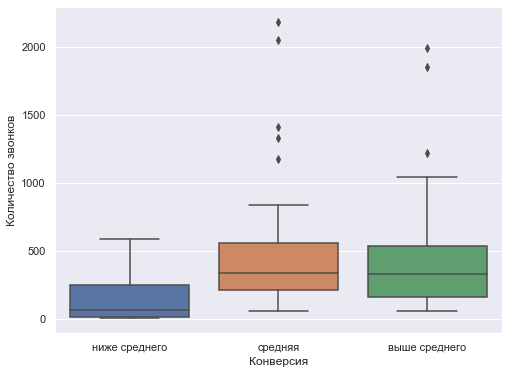

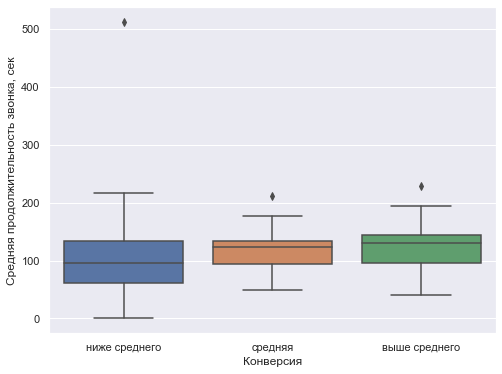

In [16]:
plt.figure(figsize = (8,6))
ax = sns.boxplot(x="conversion_level", y="n_calls",
            data=agents_data)
ax.set(#title = 'Распределение операторов по продолжительности и количеству с звонков для разных уровней продажной конверсии',
                xlabel = 'Конверсия',
                ylabel = 'Количество звонков')
plt.show()

plt.figure(figsize = (8,6))
ax = sns.boxplot(x="conversion_level", y="avg_call_sec",
            data=agents_data)
ax.set(#title = 'Распределение операторов по продолжительности и количеству с звонков для разных уровней продажной конверсии',
                xlabel = 'Конверсия',
                ylabel = 'Средняя продолжительность звонка, сек')
plt.show()


**Вывод:**

- Всего проанализированно 106 сотрудников

- Среднее количество звонков = 373.5, при этом медиана всего 250 (за счет несколько выдающихся сотрудников с количеством звонков больше 1500 тысяч), минимальное количество = 1(новый сотрудник или ошибка?) и максимальное = 2186. При этом 75% сотрудников сделали менее 423 звонков. 

- Средняя продолжительность звонка = 118 сек, минимальная = 0, максимальная = 511. 

- Продажная конверсия - среднее значение = 0.35, максимальное 0.62, минимальная = 0 (нет успешных дозвонов). Сотрудники с нулевой конверсией:
    - 'dvkajdalova',
    -  'efskvortsova',
    - 'essamoxina42807',
    -  'evsamojlov26814',
    -  'eyulobanova',
    -  'eyuvinokurova',
    -  'iimakedonskaya',
    -  'maemelyanova',
    -  'nsbochkareva',
    -  'nvtereshhenko89702',
    -  'ogbogomolova',
    -  'ogsorokoletova28872',
    -  'ssshamuratova',
    - 'tavnukova',
    - 'tvleskovec',
    - 'yuapodorueva'

- Я разделила сотрудников на три группы по уровню конверсии(ниже среднего, средняя и выше среднего):
    - по графикам видно, что группа с низкой конверсией имеет самый маленькую среднюю продолжительность разговора, группа с конверсией выше среднего - самую большую 
    - Среднее количество звонков у группы с низкой конверсией существенно ниже среднего количество звонков у других групп

## Задание 3


- Написать SQL запрос для решения Задания 1.


## Решение 

SELECT *

FROM call

LEFT JOIN task ON task.task_id=   call.task_id 

LEFT JOIN result_product  ON result_product.hid = task.hid



## Задание 4

1. Расчитать требуемое количество операторов по дням и по часам в рамках каждого дня.
2. Расчитать требуемое количество человеко часов на каждый день.

Параметры модели:

    - SL/TST	80/20
    - AR (LCR)	3%
    - Загруженность (Occupancy)	70-80%
    - ASA (среднее время до ответа оператора)	20 сек
    - АНТ входящих	4,8 мин

In [17]:
# Чтение данных о загруженности по дням и часам

daily_calls = pd.read_excel(file_name, sheet_name = 'Задание 4 ', usecols = 'A:B', header = 12)
display(daily_calls.head())

hour_calls = pd.read_excel(file_name, sheet_name = 'Задание 4 ', usecols = 'E:F', header = 12,nrows = 24)
hour_calls = hour_calls.rename(columns = {'Распределение звонков по временным интервалам':'calls_fraction',
                                         'Временной интервал':'timeslot'})
display(hour_calls.head())

Дата  Входящий голосовой
0  день 1                7114
1  день 2                7954
2  день 3                6893
3  день 4                9474
4  день 5               10244

timeslot  calls_fraction
0      0-1         0.00165
1      1-2         0.00079
2      2-3         0.00046
3      3-4         0.00058
4      4-5         0.00133

In [18]:
# функции для модели

def calc_Pw(A, N):
    '''
    рассчитать вероятность ответа на звонок с ожиданием (Pw)
    А - интенсивность траффика в час
    N -  количество работников
    по формуле Эрланга
    '''
    X = math.pow(A, N)/math.factorial(N)*(N/(N-A))
    Y = 0
    for i in range(0, N):
        #print(i)
        Y += math.pow(A,i)/math.factorial(i)
        #print(i, Y)
    return X/(X+Y)


def find_required_N_agents(calls_fraction,calls_per_day, target_time, AHT, SL_cutoff, occupancy_cutoff):
    '''
     Рассчитывает необходимое количество работников для обеспечения нужного Service Level 
    при заданных:
    AHT = Average Handling Time (seconds) 
    и target_time = Target Answer Time (Seconds) 20
    А - интенсивность траффика в час
    Использовала модель отсюда - https://www.callcentrehelper.com/erlang-c-formula-example-121281.htm
    '''
    
    A = calls_per_day*calls_fraction*AHT/60
    AHT_sec = AHT*60
    SL = 0
    N = int(np.round(A))
    while SL < SL_cutoff:
        N = N+1
        Pw = calc_Pw(A,N)
        SL = (1-Pw*math.exp(-(N-A)*target_time/AHT_sec))*100
    
    ASA = Pw*AHT_sec/(N-A)   #средняя скорость ответа, сек
    occupancy = A/N*100  #загруженность
    if occupancy > occupancy_cutoff:
        N = A/(occupancy_cutoff/100)
    return int(N)

In [19]:
#параметры модели
# SL/TST	80/20
# AR (LCR)	3%
# Загруженность (Occupancy)	70-80%
# ASA (среднее время до ответа оператора)	20 сек
# АНТ входящих	4,8 мин

AHT = 4.8
Occupancy = 80
ASA = 20
AR = 3
SL = 80
TST = 20
# находим необходимое количество людей для каждого часа для каждого дня

for i in range(0,daily_calls.shape[0]):
        calls = daily_calls.iloc[i,1]
        column_name = daily_calls.iloc[i,0]
        hour_calls[column_name] = hour_calls['calls_fraction'].apply(find_required_N_agents,
                                                                        calls_per_day = calls , 
                                                                        target_time = TST, 
                                                                        AHT = AHT, 
                                                                        SL_cutoff = SL, 
                                                                        occupancy_cutoff = Occupancy)
display(hour_calls)
hour_calls.to_csv('hour_calls.csv',float_format='%.4f')

timeslot  calls_fraction  день 1  день 2  день 3  день 4  день 5  день 6  \
0       0-1         0.00165       3       3       3       3       3       4   
1       1-2         0.00079       2       2       2       2       2       2   
2       2-3         0.00046       2       2       2       2       2       2   
3       3-4         0.00058       2       2       2       2       2       2   
4       4-5         0.00133       2       3       2       3       3       3   
5       5-6         0.00375       4       5       4       5       6       6   
6       6-7         0.00829       8       8       7       9      10      12   
7       7-8         0.02354      18      19      17      22      24      28   
8       8-9         0.04942      35      39      34      46      50      60   
9      9-10         0.07011      49      55      48      66      71      85   
10    10-11         0.09702      69      77      66      91      99     118   
11    11-12         0.09019      64      71      62      85      92     110   
12    12-13         0.09085      64      72      62      86      93     111   
13    13-14         0.08716      62      69      60      82      89     106   
14    14-15         0.08251      58      65      56      78      84     100   
15    15-16         0.07648      54      60      52      72      78      93   
16    16-17         0.07036      50      55      48      66      72      85   
17    17-18         0.06849      48      54      47      64      70      83   
18    18-19         0.05976      42      47      41      56      61      73   
19    19-20         0.04951      35      39      34      46      50      60   
20    20-21         0.03443      24      27      24      32      35      42   
21    21-22         0.02009      15      17      15      20      21      24   
22    22-23         0.00928       8       9       8      10      11      13   
23    23-00         0.00397       5       5       4       6       6       7   

    день 7  день 8  день 9  день 10  день 11  день 12  день 13  день 14  \
0        3       2       3        3        3        3        3        3   
1        2       2       2        2        2        2        2        2   
2        2       1       2        2        2        2        2        2   
3        2       2       2        2        2        2        2        2   
4        3       2       2        3        2        2        2        2   
5        5       4       4        5        4        4        4        4   
6        8       6       7        8        8        8        7        7   
7       18      13      15       20       17       17       17       17   
8       36      25      29       40       34       34       34       33   
9       51      35      42       57       48       48       48       47   
10      71      48      58       79       67       67       67       66   
11      66      45      54       73       62       63       62       61   
12      66      45      54       74       63       63       63       62   
13      64      43      52       71       60       60       60       59   
14      60      41      49       67       57       57       57       56   
15      56      38      45       62       53       53       53       52   
16      51      35      42       57       49       49       48       48   
17      50      34      41       55       47       47       47       46   
18      43      29      35       48       41       41       41       40   
19      36      25      29       40       34       34       34       33   
20      25      18      21       28       24       24       24       23   
21      16      12      13       17       15       15       15       15   
22       9       6       7        9        8        8        8        8   
23       5       4       4        5        5        5        5        4   

    день 15  день 16  день 17  день 18  день 19  день 20  день 21  день 22  \
0         3        3        3        3        3        3        3        

In [20]:
# общее число человекочасов по дням

daily_calls = pd.merge(daily_calls, 
         hour_calls.drop(columns = ['timeslot','calls_fraction']).sum(axis = 0).to_frame(name = 'Человекочасы'),
         right_index=True, 
         left_on='Дата')
daily_calls.to_csv('daily_calls.csv' )
display(daily_calls)

Дата  Входящий голосовой  Человекочасы
0    день 1                7114           723
1    день 2                7954           805
2    день 3                6893           700
3    день 4                9474           954
4    день 5               10244          1034
5    день 6               12223          1229
6    день 7                7348           748
7    день 8                5015           515
8    день 9                5997           612
9   день 10                8170           827
10  день 11                6969           707
11  день 12                6987           708
12  день 13                6935           705
13  день 14                6825           692
14  день 15                8285           839
15  день 16                7225           733
16  день 17                7824           792
17  день 18                7200           731
18  день 19                8838           891
19  день 20                7667           776
20  день 21                6387           648
21  день 22                6736           685
22  день 23                8510           862
23  день 24                8910           901
24  день 25                8784           888
25  день 26                8417           851
26  день 27                8040           815
27  день 28                8155           827
28  день 29                6514           661
29  день 30                6633           673
30  день 31                6879           698